In [1]:
from starter_code import ani1_config, load_ani1_data, calc_resid, create_heatmap, create_boxplot, filter_outliers

import matplotlib.pyplot as plt

## Load ANI-1 Data

In [2]:
molecules = load_ani1_data()
# Calculate the residual vector for each method-method combination
resid = calc_resid(molecules, show_progress=True)

data file path is ./ANI-1ccx_clean_fullentry.h5


100%|██████████| 91/91 [00:08<00:00, 10.18it/s]


### MAE Heatmaps

Here we plot the MAE between quantum chemical methods in a heatmap.

100%|██████████| 91/91 [00:00<00:00, 2577.59it/s]


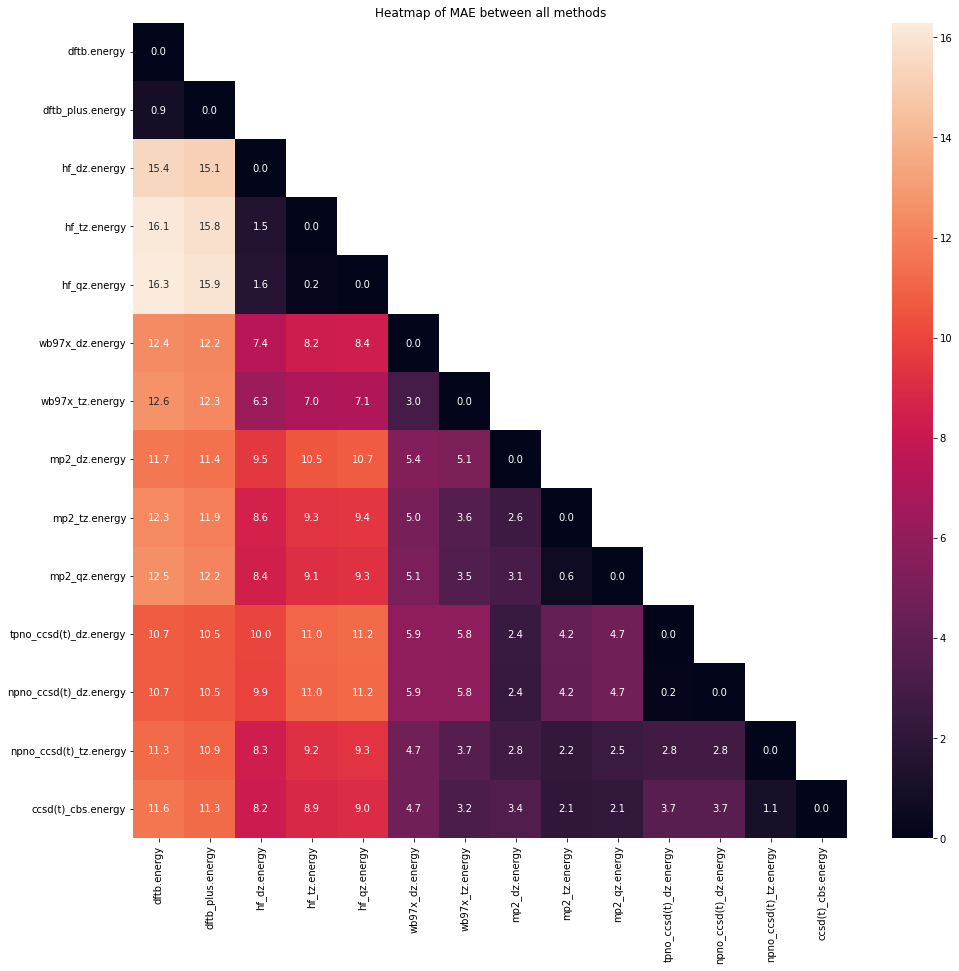

In [3]:
# Create a heatmap of the MAE between methods
fig, ax = plt.subplots(figsize=(16, 15))
create_heatmap(
    ani1_config["target"],
    data_matrix=resid,
    show_progress=True
)

plt.title("Heatmap of MAE between all methods")
plt.show()

### Boxplots

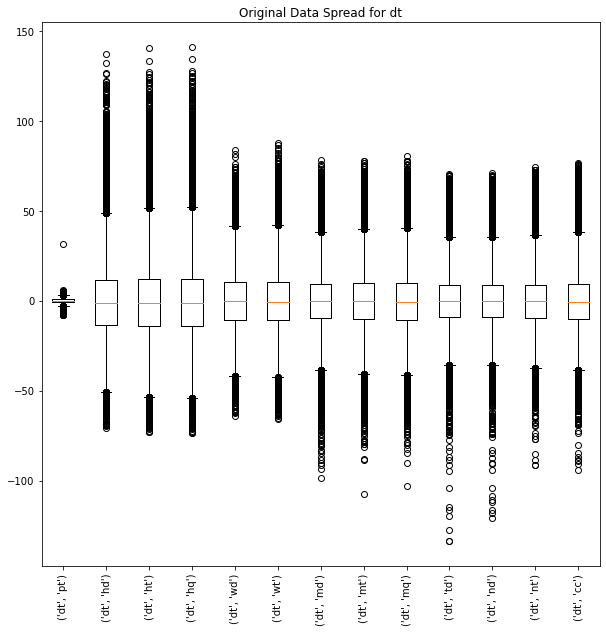

In [4]:
# Original data boxplot
create_boxplot(resid, "Original Data Spread", "dt")

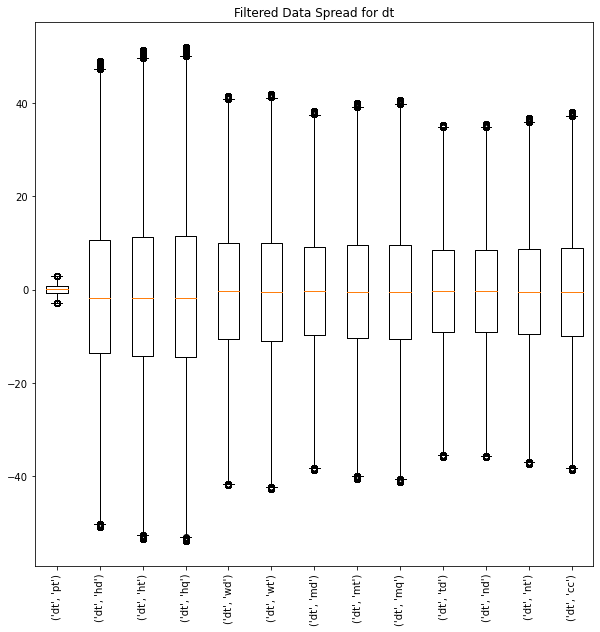

In [5]:
# %% Filtering Data Visualizations
filtered_data = filter_outliers(resid)

# Filtered data boxplot
create_boxplot(filtered_data, "Filtered Data Spread", "dt")

### Heatmap of number of outliers

100%|██████████| 91/91 [00:00<?, ?it/s]


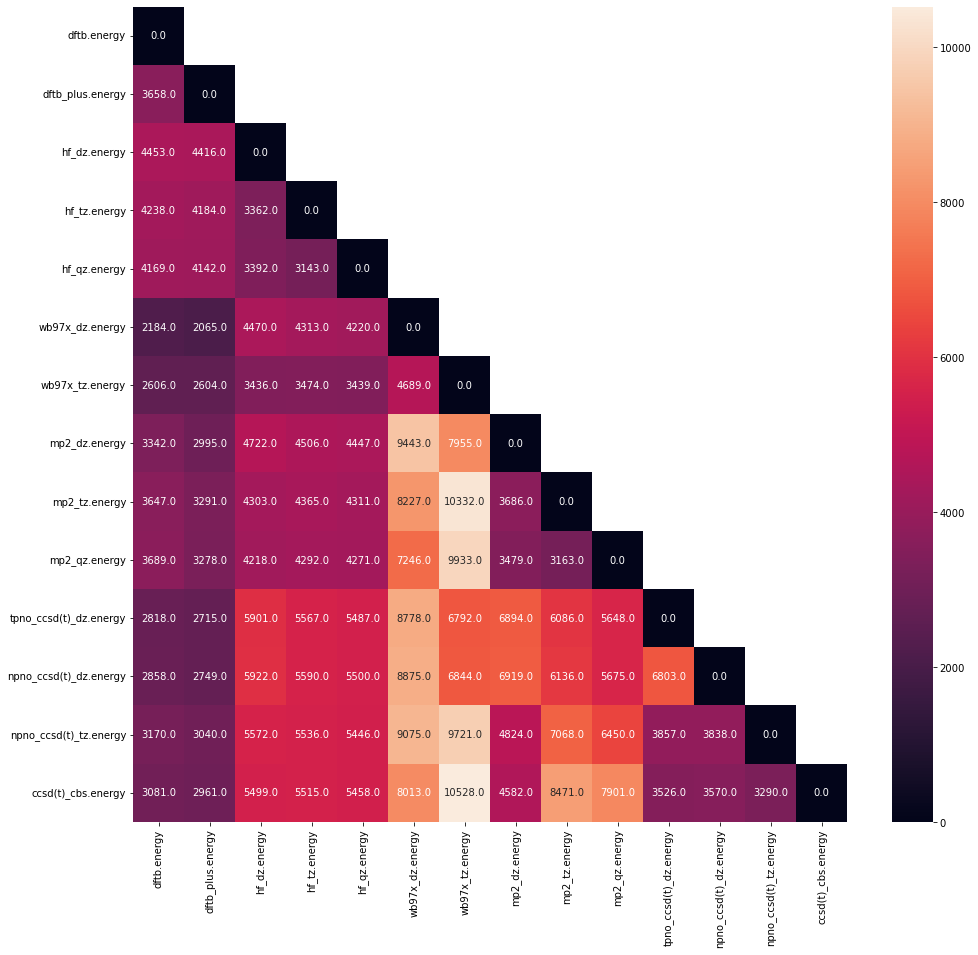

In [6]:


# Heatmap of number of outliers
# Get number of outliers
n_outliers = {}
for (target_1, target_2) in resid:
    n_outliers[target_1, target_2] = len(resid[target_1, target_2]) - len(filtered_data[target_1, target_2])
# Plot
outlier_map = plt.subplots(figsize=(16, 15))
create_heatmap(
    ani1_config["target"],
    data_matrix=n_outliers,
    show_progress=True
)
# okay to use create_heatmap since mean of 1 number is just the number
plt.show()

